# Naive Bayes

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import codecs
import re

## Importing the dataset

In [2]:
dataset = pd.read_csv(r'datasets_483_982_spam.csv', encoding = 'latin-1')
all_data = []

for content,label in dataset[['v2','v1']].values:
    if label == 'spam':
        label = 1
    else :
        label = 0
    all_data.append([content, label])
all_data = np.array(all_data)

### 取出訓練內文與標註

In [3]:
X = all_data[:,0]
Y = all_data[:,1].astype(np.uint8)

In [4]:
print('Training Data Examples : \n{}'.format(X[:5]))

Training Data Examples : 
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"]


In [4]:
print('Labeling Data Examples : \n{}'.format(Y[:5]))

Labeling Data Examples : 
[0 0 1 0 0]


### 文字預處理

In [51]:
from sklearn.metrics import confusion_matrix, recall_score,classification_report
from nltk.corpus import stopwords

import nltk

nltk.download('stopwords')

# Lemmatize with POS Tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

## 創建Lemmatizer
lemmatizer = WordNetLemmatizer() 
def get_wordnet_pos(word):
    """將pos_tag結果mapping到lemmatizer中pos的格式"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def clean_content(X):
    # remove non-alphabet characters
    X_clean = [re.sub('[^a-zA-Z]',' ', x).lower() for x in X]
    # tokenize
    X_word_tokenize = [nltk.word_tokenize(x) for x in X_clean]
    # stopwords_lemmatizer
    X_stopwords_lemmatizer = []
    stop_words = set(stopwords.words('english'))
    for content in X_word_tokenize:
        content_clean = []
        for word in content:
            if word not in stop_words:
                word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
                content_clean.append(word)
        X_stopwords_lemmatizer.append(content_clean)
    
    X_output = [' '.join(x) for x in X_stopwords_lemmatizer]
    
    return X_output
                 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evenpan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
X = clean_content(X)

## Bag of words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
#max_features是要建造幾個column，會按造字出現的高低去篩選 
# "藉由BOW方式將資料轉換為Vector，自行填入"
cv = CountVectorizer(max_features= 4000)
X_trans = cv.fit_transform(X).toarray()

In [24]:
X_trans.shape

(5572, 4000)

## Splitting the dataset into the Training set and Test set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, test_size = 0.19, random_state = 2077)

## Fit the MultinomialNB model on the Training set

In [71]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

## Predicting a new result (可與前章節KNN模型比較)

In [72]:
print('Trainset Accuracy: {}'.format(nb.score(X_train, y_train)))

Trainset Accuracy: 0.9906935519610015


In [73]:
print('Testset Accuracy: {}'.format(nb.score(X_test, y_test)))

Testset Accuracy: 0.9811142587346553


## Predicting the Test set results

In [74]:
y_pred = nb.predict(X_test)

## Making the Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[903  10]
 [ 10 136]]


0.9811142587346553

In [76]:
from sklearn.metrics import classification_report

target_names = ['ham','spam']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       913
        spam       0.93      0.93      0.93       146

    accuracy                           0.98      1059
   macro avg       0.96      0.96      0.96      1059
weighted avg       0.98      0.98      0.98      1059



In [40]:
def plot_cm_output(cm, labels=['ham', 'spam']):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap=plt.cm.Blues,)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

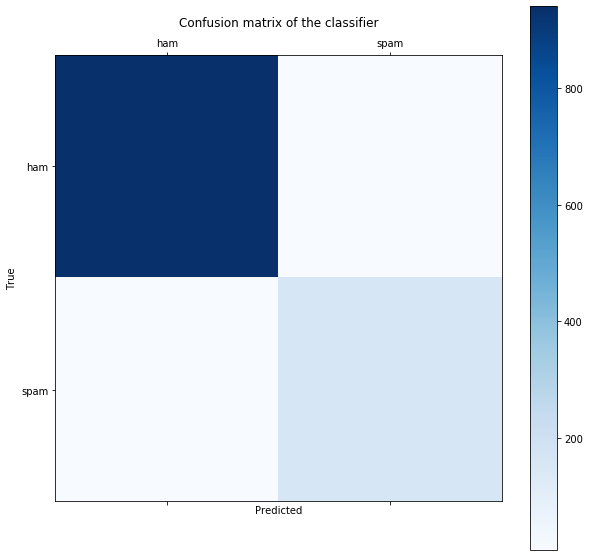

In [22]:
plot_cm_output(cm)

In [41]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [42]:
X_train[X_train>1]=1
X_test[X_test>1]=1

In [43]:
clf_B = BernoulliNB()
clf_B.fit(X_train, y_train)

BernoulliNB()

In [44]:
print('Trainset Accuracy: {}'.format(clf_B.score(X_train, y_train)))

Trainset Accuracy: 0.9867050742300022


In [45]:
print('Testset Accuracy: {}'.format(clf_B.score(X_test, y_test)))

Testset Accuracy: 0.9811142587346553


In [64]:
y_pred = clf_B.predict(X_test)
cm_output = confusion_matrix(y_test, y_pred)

In [59]:
print(type(y_pred[0]))
print(type(y_test[0]))

<class 'numpy.uint8'>
<class 'numpy.uint8'>


In [66]:
from sklearn.metrics import classification_report

target_names = ['ham','spam']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       913
        spam       0.98      0.88      0.93       146

    accuracy                           0.98      1059
   macro avg       0.98      0.94      0.96      1059
weighted avg       0.98      0.98      0.98      1059



In [ ]:
cm_output
#可以發現他的type1 error表現得超好，也就是說，今天消費者不滿意時，可以準確地被判定出來
#但由於模型的accuracy 其實是差不多的，代表在消費者滿意的情況有比較多錯誤預測成不開心的情況

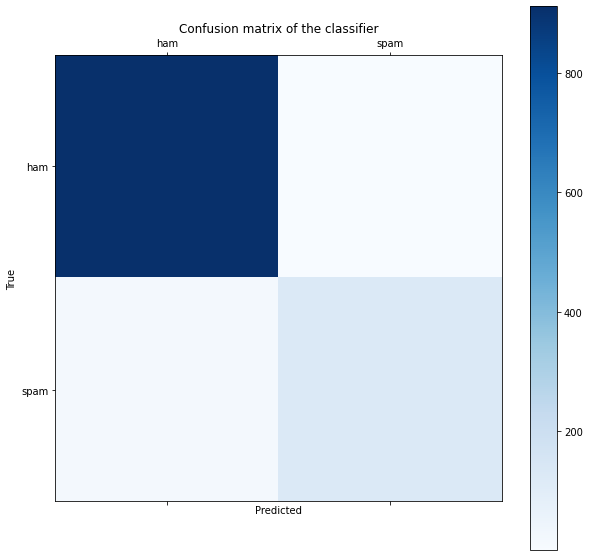

In [49]:
plot_cm_output(cm_output)